# 서울 지하철 시간대별 분석

In [53]:
import csv
import matplotlib.pyplot as plt
import platform

In [54]:
f = open('../Data/subwaytime.csv', encoding='utf-8')
data = csv.reader(f)

header = next(data)
print(header)
f.close()

['사용월', '호선명', '역ID', '지하철역', '04:00:00~04:59:59', '', '05:00:00~05:59:59', '', '06:00:00~06:59:59', '', '07:00:00~07:59:59', '', '08:00:00~08:59:59', '', '09:00:00~09:59:59', '', '10:00:00~10:59:59', '', '11:00:00~11:59:59', '', '12:00:00~12:59:59', '', '13:00:00~13:59:59', '', '14:00:00~14:59:59', '', '15:00:00~15:59:59', '', '16:00:00~16:59:59', '', '17:00:00~17:59:59', '', '18:00:00~18:59:59', '', '19:00:00~19:59:59', '', '20:00:00~20:59:59', '', '21:00:00~21:59:59', '', '22:00:00~22:59:59', '', '23:00:00~23:59:59', '', '00:00:00~00:59:59', '', '01:00:00~01:59:59', '', '02:00:00~02:59:59', '', '03:00:00~03:59:59', '']


## map 함수 실습

In [55]:
a = [1, 2, 3, 4, 5]

aa = map(lambda x: x*x, a)
print(list(aa))
sa = map(str, a)
print(list(sa))

[1, 4, 9, 16, 25]
['1', '2', '3', '4', '5']


## 시간대별 지하철 이용 수
- 새벽 4시 지하철 승차 전체 인원

In [56]:
result = []
total_number = 0

with open('../Data/subwaytime.csv', encoding='utf-8') as f:
    data = csv.reader(f)
    next(data)
    next(data)

    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])

print(f'총 지하철 역의 수: {len(result)}')
print(f'새벽 4시 승차인원: {total_number}')

총 지하철 역의 수: 615
새벽 4시 승차인원: 135398


새벽 4시 승차인원수: 135398
최대 승차역: 구로, 인원수: 11784


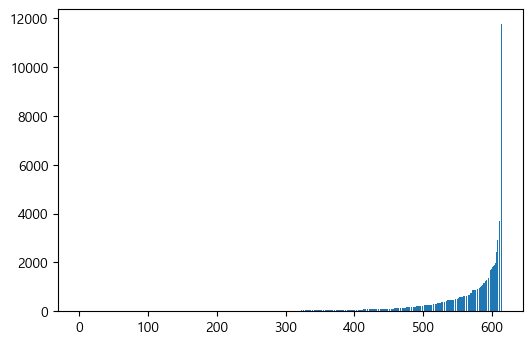

In [57]:
with open('../Data/subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        total_number += row[4]
        result.append(row[4])

        if max_num < row[4]:
            max_num = row[4]
            max_station = row[3]

print(f'새벽 4시 승차인원수: {total_number}')
print(f'최대 승차역: {max_station}, 인원수: {max_num}')

result.sort()
plt.figure(dpi=100)
plt.bar(range(len(result)), result)

plt.show()

## 출근시간대 인원수

최대 승차 인원역 : 신림(2호선), 638753


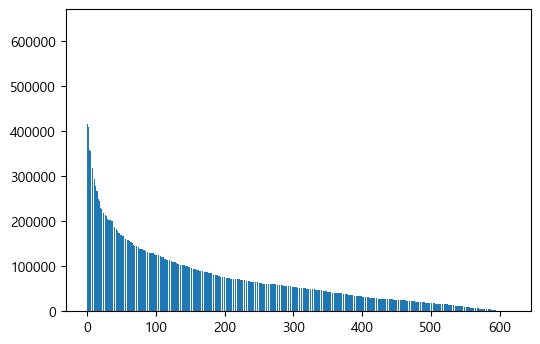

In [58]:
with open('../Data/subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    result = []
    total_number = 0
    max_num = 0
    max_station = ''

    for row in data:
        row[4:] = map(int, row[4:])
        row_sum = sum(row[10:15:2])
        result.append(row_sum)
        if max_num < row_sum:
            max_num = row_sum
            max_station = row[3] + '(' + row[1] + ')'

print(f'최대 승차 인원역 : {max_station}, {max_num}')
result.sort(reverse=True)
plt.figure(dpi=100)
plt.bar(range(len(result)), result)
plt.show()

## 시간대별 가장 많이 승차하는 역 정보 분석
- 새벽 4시 ~ 다음날 새벽 2시

In [59]:
with open('../Data/subwaytime.csv') as f:
    data = csv.reader(f)
    next(data)
    next(data)
    max = [0] * 23
    max_station = [''] * 23
    xticks_list = []

    for i in range(4,27):
        n = i % 24
        xticks_list.append(n)

    for row in data:
        row[4:] = map(int, row[4:])
        for j in range(23):
            a = row[j * 2 + 4]
            if a > max[j]:
                max[j] = a
                max_station[j] = str(xticks_list[j]) + '시:' + row[3]

    for i in range(len(max)):
        print(f'{max_station[i]}: {max[i]}', end=',')
        if (i + 1) % 4 == 0:
            print()

4시:구로: 11784,5시:신림: 38809,6시:신림: 73523,7시:신림: 188110,
8시:신림: 281017,9시:신림: 169626,10시:신림: 91989,11시:신림: 77496,
12시:잠실(송파구청): 84383,13시:강남: 95697,14시:강남: 106394,15시:강남: 131625,
16시:강남: 154526,17시:강남: 231839,18시:강남: 314775,19시:강남: 196425,
20시:강남: 155347,21시:강남: 180108,22시:강남: 176473,23시:강남: 81016,
0시:강남: 12407,1시:건대입구: 8,2시:동묘앞: 1,

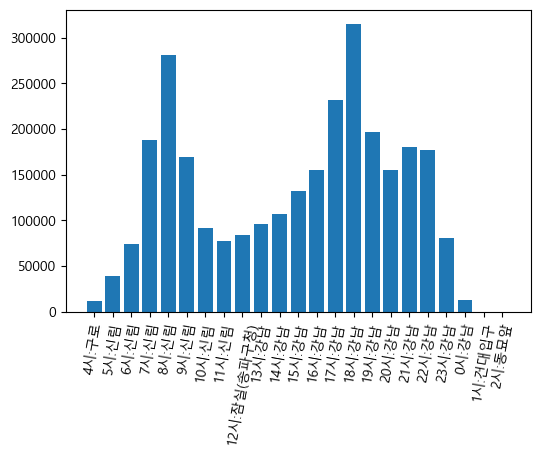

In [61]:
if(platform.system() == 'Windows'):
    plt.rc('font', family = 'Malgun Gothic')
else:
    plt.rc('font', family = 'AppleGothic')
plt.figure(dpi=100)
plt.bar(range(23), max)
plt.xticks(range(23), max_station, rotation=80)
plt.show()